<h3>1 - Object compilation example</h3>

This is a modification of the example shown by Evan Pattern in this youtube video: [~ 36 min]  
https://www.youtube.com/watch?v=7dmrDYQh4rc

The Slides of his talk are available here:  
https://www.epatters.org/assets/slides/2020-catlab/mit-iap-2020.slides#/6

This part of the workbook expands his example to illustrate how it can be used to generate numerical outputs.

<h4> Code: </h4>

In [1]:
#Include Packages and modules

using Catlab
using Catlab.Theories
using Catlab.Graphics
using Catlab.Graphics.Graphviz
using Catlab.WiringDiagrams
using Catlab.LinearAlgebra
using Catlab.Programs
using Plots

In [2]:
# Define MACRO with desired elements or functions

@present TrigFunctions(FreeCartesianCategory) begin
    R::Ob                     # Object of Real numbers
    sin::Hom(R,R)             # Sine function, Transform R into R
    cos::Hom(R,R)             # Cosine function, Transform R into R
    
    # Operations between functions
    (+)::Hom(otimes(R,R),R)   # Addition, operates on R and R, and outputs R
    (*)::Hom(otimes(R,R),R)   # Multiplication, operates on R and R, and outputs R
end;

With the above macro, one can make instances of different objets using the "generator" function.

In [3]:
# Instances of Function objects:

display( generator(TrigFunctions, :cos) )
display( generator(TrigFunctions, :sin) )

cos

sin

In [4]:
# Instances of relationships between functions:

display( generator(TrigFunctions, :+) )
display( generator(TrigFunctions, :*) )

+

*

One can use the returned objects to generate Compositions or other relationships

In [5]:
# General function that selects speficic objects from MACRO. 

genFunc( input::Symbol ) = generator( TrigFunctions, input );

In [6]:
# Compose functions with specified operator

comp_sum = compose( mcopy( genFunc(:R) ),                    # Define input domain
                    otimes( genFunc(:cos), genFunc(:sin) ),  # Functions to compose
                    genFunc(:+) );                           # Apply operator between functions

comp_mul = compose( mcopy( genFunc(:R) ),                   
                    otimes( genFunc(:cos), genFunc(:sin) ), 
                    genFunc(:*) );                           # Apply Multiplication

In [9]:
# Diplay compositions
display( comp_sum )
display( comp_mul )

compose(mcopy(R),otimes(cos,sin),+)

compose(mcopy(R),otimes(cos,sin),*)

These objects can be transformed to uncompiled Julia code.  

See this link for more information on how to use "Expr" data type.  
https://syl1.gitbook.io/julia-language-a-concise-tutorial/language-core/metaprogramming

In [10]:
# Transform objects into Code snippets

expr_cos = compile_expr( genFunc(:cos), args = [:x] )

:(function (x,)
      v1 = cos(x)
      return v1
  end)

In [12]:
expr_sin = compile_expr( genFunc(:sin), args = [:x] )

:(function (x,)
      v1 = sin(x)
      return v1
  end)

In [13]:
expr_sum = compile_expr( comp_sum, args = [:x] )

:(function (x,)
      v1 = cos(x)
      v2 = sin(x)
      v3 = v1 + v2
      return v3
  end)

In [14]:
expr_mul = compile_expr( comp_mul, args = [:x] )

:(function (x,)
      v1 = cos(x)
      v2 = sin(x)
      v3 = v1 * v2
      return v3
  end)

In [15]:
# Transform "Expr" types into functions that can be evaluated:

funcCos = eval( expr_cos );
funcSin = eval( expr_sin );
funcSum = eval( expr_sum );
funcMul = eval( expr_mul )

#9 (generic function with 1 method)

Once compiled, this code can be used like any other function in the program. They are essentially anonymous functions generated from the inital MACRO.

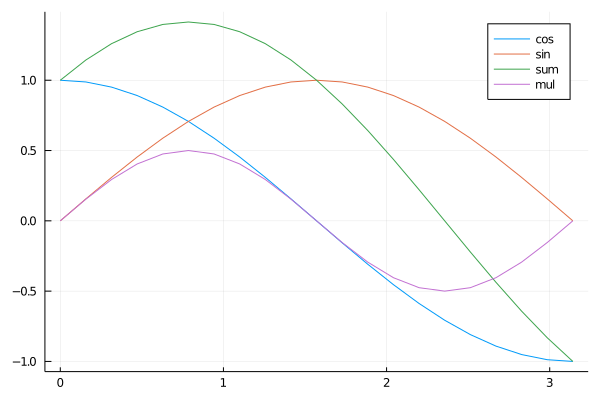

In [16]:
# Test generated Functions by plotting output

# Input
n = 20;
x = [0: pi/n: pi;];

# Output
y1 = funcCos.(x);
y2 = funcSin.(x);
y3 = funcSum.(x);
y4 = funcMul.(x);

# Display results
plot( x, [y1, y2, y3, y4], labels = ["cos" "sin" "sum" "mul"] )

<h3>2 - Example with basic operations</h3>

In this example only basic operations for an array or a vector will be considered. The idea here is to replicate the relationships that can be formed with block-diagram algebra used in introductory control theory. 

![Cat](https://github.com/rgCategory/composition_notebook/blob/main/images/notes_1.png?raw=true)

In [7]:
@present LinearElements(FreeCartesianCategory) begin
    R::Ob                     # Object of Real numbers

    # Operations between Numbers [Implicit functions, note the same structure as sine and cosine]
    (+)::Hom(otimes(R,R),R)   # Addition, operates on R and R, and outputs R
    (-)::Hom(otimes(R,R),R)   # Subtraction
    (*)::Hom(otimes(R,R),R)   # Multiplication
    (\)::Hom(otimes(R,R),R)   # Matrix division
end;

In [8]:
# Generate relationship with operators
gen_lin( input::Symbol ) = generator( LinearElements, input );

# Create code snippet
expr_lin( input::Symbol ) = compile_expr( gen_lin(input), args = [:A, :B] );

# Compile code into function
func_lin( input::Symbol ) = eval( expr_lin(input) );

In [9]:
# Display Operators
gen_sum = gen_lin(:+);
gen_sub = gen_lin(:-);
gen_mul = gen_lin(:*);
gen_div = gen_lin(:\);

display( gen_sum );
display( gen_sub );
display( gen_mul );
display( gen_div );     # Division character is not shown?

+

-

*

\

In [10]:
# General functions based on operators - Works with matrices
 
f_add = func_lin(:+);
f_sub = func_lin(:-);
f_mul = func_lin(:*);
f_div = func_lin(:\)

#7 (generic function with 1 method)

In [11]:
# Example Evaluations - Matrices

# Input values
A = [1 3 6; 5 3 7; 4 1 6];
B = [9;4;2;];
C = [1;1;1;];

# Evaluate instances [Operators are two input functions]
println( f_add(B, C) );
println( f_sub(B, C) );
println( f_mul(A, C) );
println( f_div(A, B) );

[10, 5, 3]
[8, 3, 1]
[10, 15, 11]
[-1.5405405405405408, 1.189189189189189, 1.1621621621621623]


Like before one can compose basic functions. The result can be compiled to form a more complicated function.

In [12]:
# Compose Relationships 
comp_t = compose( otimes(gen_sum, gen_sub), gen_mul );
expr_t = compile_expr( comp_t );
func_t = eval(expr_t);

# Show output
display( comp_t )
display( expr_t )

compose(otimes(+,-),*)

:(function (x1, x2, x3, x4)
      v1 = x1 + x2
      v2 = x3 - x4
      v3 = v1 * v2
      return v3
  end)

As the function is constructed from a connection of homologies, one can construct a wire diagram from it. This allows for a direct connection between the executable function and the diagram. 

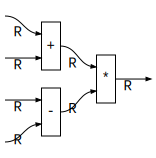

In [13]:
# Function to display wiring diagrams

show_diagram(d::WiringDiagram) = to_graphviz(d,
  orientation=LeftToRight,
  labels=true, label_attr=:xlabel,
  node_attrs=Graphviz.Attributes(
    :fontname => "Courier",
  ),
  edge_attrs=Graphviz.Attributes(
    :fontname => "Courier",
  )
)

# Convert composition to diagrams
comp_wd = to_wiring_diagram( comp_t );

# Display figure
show_diagram( comp_wd )

As the basic operators are designed to be general, one can use the above relationship for scalar values and vectors/matrices.

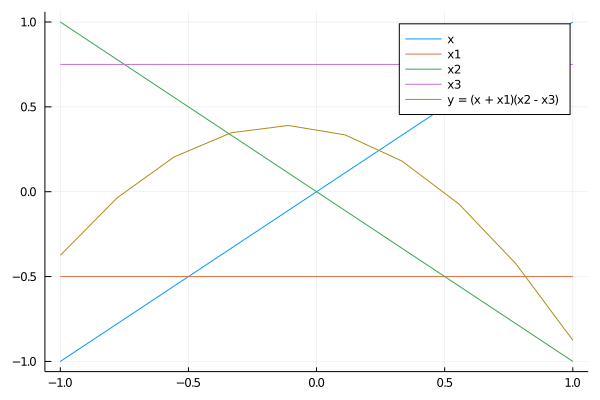

In [29]:
# Evaluate numerical function of composition:

#--- Scalar Case:

# Inputs
n = 10;
x = [-1: 2/(n-1): 1;];
x1 = repeat([-0.5], n);
x2 = -x;
x3 = repeat([0.75], n);

#Output: [Must be element-wise as vector multiplication is undefined]
y = func_t.(x, x1, x2, x3);

#Display result
plot( x, [x, x1, x2, x3, y], label = ["x" "x1" "x2" "x3" "y = (x + x1)(x2 - x3)"] )

<h3>3 - Example with feedback</h3>

This is an attempt to create a 1rst order system via composition. [Incomplete]

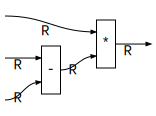

In [14]:
# Input stage of system:  

# Real number object
gen_r = gen_lin(:R)

# Create function that returns input
id_r = id( gen_lin(:R) )                # Identity 

# Join operations
fig1 = compose( otimes(id_r, gen_sub),  # Create 2 outputs 
                gen_mul );              # Receive 2 inputs

show_diagram( to_wiring_diagram(fig1) )

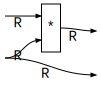

In [15]:
# Output section of system:

# Note: The order in which blocks are joined (in otimes) dictates the output format. 
#       The output format MUST match the input format. N_inputs = N_outputs

# Subsections of diagram
fig2a = otimes( id_r, mcopy(gen_r) );    # 3 outputs: 1 raw output, 2 equal outputs
fig2b = otimes( gen_mul, id_r );         # 3 inputs: 2 from multiply, 1 raw value
fig2 = compose( fig2a, fig2b )           # Join subsections

show_diagram( to_wiring_diagram(fig2) )

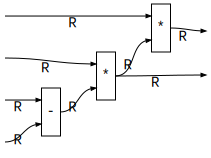

In [16]:
# Combine input section of diagram with input section:

fig3a = otimes( id_r, fig1 )        # 2 Outputs: 1 raw value, 1 output of input section 
fig3 = compose( fig3a, fig2 )       # 2 Inputs: Inputs from output section

show_diagram( to_wiring_diagram(fig3) )

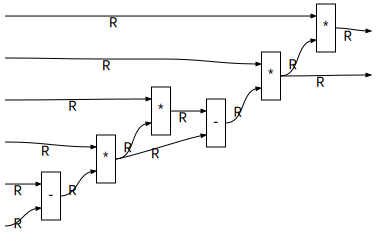

In [17]:
# Join Output of system wth input of system [incomplete]

fig4 = gen_mul; 
fig4 = compose( otimes(id_r, id_r, fig3), fig3 )

show_diagram( to_wiring_diagram(fig4) ) # Need to have output of node connecting back into its own input

Unfortunately, composing a diagram with itself merely copies the diagram. A closed loop is not formed with this naive method. In fact, it may be impossible to do this, as the expressions the blocks generate must always be explicit. If the output of the net function depends on its own value, then its output is ambiguous and there is no clear cause and effect.   

Ideally the feedback loop would look like this:

![Cat](https://github.com/rgCategory/composition_notebook/blob/main/images/desired_output.png?raw=true)

In light of this restriction, a different framework is needed to generate feedback loops. The [Algebraic Dynamics](https://github.com/AlgebraicJulia/AlgebraicDynamics.jl) package offer such a framework. 

### Miscellaneous

Below hand written notes relevant to the concept of block diagram algebra. The assumption is that every box represents a scalar multiplication. In a general sense, this can be viewed as a matrix, and the signals moving through the wires are vectors that are modifed by these matrices. Essentially, the wiring diagrams represent some linear algebra equation. 

![Cat](https://github.com/rgCategory/composition_notebook/blob/main/images/notes_2.png?raw=true)
![Cat](https://github.com/rgCategory/composition_notebook/blob/main/images/notes_3.png?raw=true)